In [1]:
import numpy as np
import cv2
import skimage
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

In [41]:
img = cv2.imread(r'C:\Users\Rohit\Desktop\Uwaterloo 2.0\Snipped images\5.png')
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [42]:
#large view function
def large_view(image):
    plt.figure(figsize=(9,9))
    plt.imshow(image,cmap='gray')

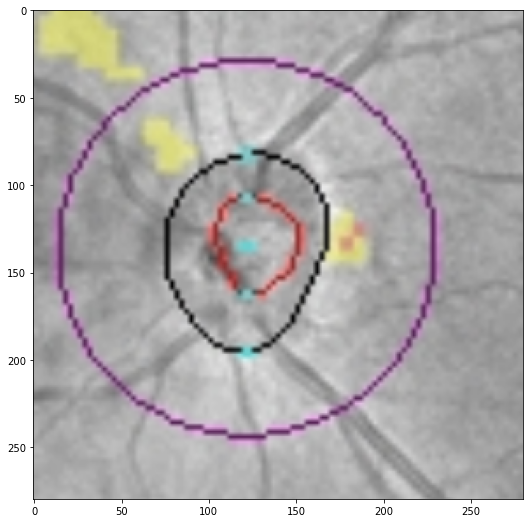

In [43]:
#Resize for uniform size
img_RGB = img_RGB[50:330,50:330]
large_view(img_RGB)

In [44]:
#modified algo/function
def binarize_adv(image_to_transform, threshold):
    img_0 = image_to_transform[:,:,0]
    img_1 = image_to_transform[:,:,1]
    img_2 = image_to_transform[:,:,2]
    # now, lets convert that image to a single grayscale image using convert()
    # the threshold value is usually provided as a number between 0 and 255, which
    # is the number of bits in a byte.
    # the algorithm for the binarization is pretty simple, go through every pixel in the
    # image and, if it's greater than the threshold, turn it all the way up (255), and
    # if it's lower than the threshold, turn it all the way down (0).
    # so lets write this in code. First, we need to iterate over all of the pixels in the
    # image we want to work with
    new_img = np.zeros(image_to_transform.shape)
    for x in range(image_to_transform.shape[1]):
        for y in range(image_to_transform.shape[0]):
            # for the given pixel at w,h, lets check its value against the threshold
            if (img_0[x,y]< threshold) & (img_2[x,y]<threshold) & (img_1[x,y]<threshold): #note that the first parameter is actually a tuple object
                # lets set this to 255
                new_img[x,y] = 255
            else:
                # otherwise lets set this to 255
                new_img[x,y] = 0
    #now we just return the new image
    return new_img

In [46]:
import xlsxwriter
workbook = xlsxwriter.Workbook('AngleTest11.xlsx')
worksheet = workbook.add_worksheet()
my_list = ['Threshold', 'Rotation angle']
worksheet.write_row(0,0,my_list)
t=2
for i in np.arange(20,81,1):
    op_img_adv = binarize_adv(img_RGB,i)
    #getting edge list
    y,x=np.nonzero(op_img_adv[:,:,1])
    edge_list = np.array([[_x,_y] for _x,_y in zip(x,y)])
    #Ellipse fitting
    _ellipse = cv2.fitEllipseDirect(edge_list)
    worksheet.write('A'+str(t),i)
    worksheet.write('B'+str(t),_ellipse[2])
    t += 1
workbook.close()

In [ ]:
#Thinnest is 20 and max is 80....Assume 5% increment all along

In [ ]:
op_img_adv = binarize_adv(img_RGB,30)
large_view(op_img_adv[:,:,1])

In [ ]:
#getting edge list
y,x=np.nonzero(op_img_adv[:,:,1])
edge_list = np.array([[_x,_y] for _x,_y in zip(x,y)])
#Ellipse fitting
_ellipse = cv2.fitEllipseDirect(edge_list)
print(_ellipse)

In [26]:
ellipse1 = cv2.ellipse(op_img_adv.copy(), _ellipse, (255,0,0),1)
ellipse2 = cv2.ellipse(img_RGB.copy(), _ellipse, (0,255,0),1)

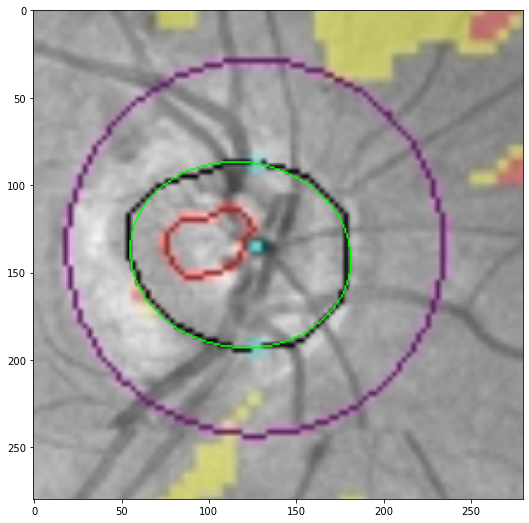

In [27]:
large_view(ellipse2)

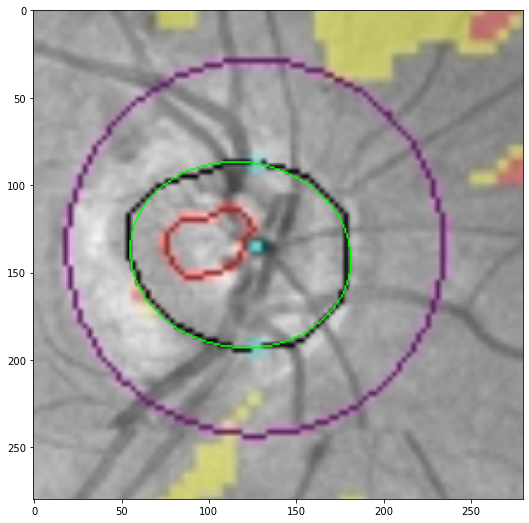

In [28]:
large_view(ellipse2)

In [29]:
from skimage.metrics import structural_similarity as ssim
s = ssim(ellipse2,ellipse3,multichannel=True)

NameError: name 'ellipse3' is not defined

In [ ]:
s